Hypothesis: A customers ratio of payment to bill size in combination with the given data points can help to predict their likelihood of default


In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from scipy import stats, special
from sklearn import metrics, linear_model, datasets, feature_selection
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
import statsmodels.api as sm

Importing and cleaning the data sets

In [106]:
data = pd.read_csv('credit_default_data.csv')
data_v2 = pd.read_csv('credit_default_data.csv')

In [107]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,dpnm
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [113]:
data.rename(columns={'PAY_1': 'PAYMENT_STATUS_1', 'PAY_2': 'PAYMENT_STATUS_2', 
                     'PAY_3': 'PAYMENT_STATUS_3', 'PAY_4': 'PAYMENT_STATUS_4',
                     'PAY_5': 'PAYMENT_STATUS_5', 'PAY_6': 'PAYMENT_STATUS_6', 
                         'dpnm': 'DEFAULT'}, inplace=True)

data_v2.rename(columns={'PAY_1': 'PAYMENT_STATUS_1', 'PAY_2': 'PAYMENT_STATUS_2', 
                         'PAY_3': 'PAYMENT_STATUS_3', 'PAY_4': 'PAYMENT_STATUS_4',
                         'PAY_5': 'PAYMENT_STATUS_5', 'PAY_6': 'PAYMENT_STATUS_6', 
                            'dpnm': 'DEFAULT'}, inplace=True)

In [109]:
data.isna().sum()

ID                  0
LIMIT_BAL           0
SEX                 0
EDUCATION           0
MARRIAGE            0
AGE                 0
PAYMENT_STATUS_1    0
PAYMENT_STATUS_2    0
PAYMENT_STATUS_3    0
PAYMENT_STATUS_4    0
PAYMENT_STATUS_5    0
PAYMENT_STATUS_6    0
BILL_AMT1           0
BILL_AMT2           0
BILL_AMT3           0
BILL_AMT4           0
BILL_AMT5           0
BILL_AMT6           0
PAY_AMT1            0
PAY_AMT2            0
PAY_AMT3            0
PAY_AMT4            0
PAY_AMT5            0
PAY_AMT6            0
DEFAULT             0
dtype: int64

In [110]:
data.duplicated().sum()

0

In [111]:
data_v2['RATIO_PMT_BLNCE1'] = data_v2['PAY_AMT1']/data_v2['BILL_AMT1']
data_v2['RATIO_PMT_BLNCE2'] = data_v2['PAY_AMT2']/data_v2['BILL_AMT2']

data_v2['RATIO_PMT_BLNCE3'] = data_v2['PAY_AMT3']/data_v2['BILL_AMT3']
data_v2['RATIO_PMT_BLNCE4'] = data_v2['PAY_AMT4']/data_v2['BILL_AMT4']

data_v2['RATIO_PMT_BLNCE5'] = data_v2['PAY_AMT5']/data_v2['BILL_AMT5']
data_v2['RATIO_PMT_BLNCE6'] = data_v2['PAY_AMT6']/data_v2['BILL_AMT6']

In [112]:
data_v2.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAYMENT_STATUS_1,PAYMENT_STATUS_2,PAYMENT_STATUS_3,PAYMENT_STATUS_4,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,RATIO_PMT_BLNCE1,RATIO_PMT_BLNCE2,RATIO_PMT_BLNCE3,RATIO_PMT_BLNCE4,RATIO_PMT_BLNCE5,RATIO_PMT_BLNCE6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,2.853200e+04,2.813300e+04,2.775400e+04,2.753000e+04,2.721800e+04,2.668500e+04
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,4826.076867,4799.387633,5215.502567,0.221200,inf,inf,inf,inf,inf,inf
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,15666.159744,15278.305679,17777.465775,0.415062,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000,0.000000,0.000000,0.000000,-3.543600e+04,-1.025950e+04,-8.215000e+04,-1.726667e+04,-7.483947e+03,-1.134957e+04
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,296.000000,252.500000,117.750000,0.000000,3.692949e-02,3.608177e-02,2.949151e-02,2.806881e-02,3.372533e-02,3.307480e-02
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,1500.000000,1500.000000,1500.000000,0.000000,6.088743e-02,5.988562e-02,4.839607e-02,4.218297e-02,4.575577e-02,4.617110e-02
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,4013.250000,4031.500000,4000.000000,0.000000,3.016836e-01,2.987750e-01,2.471528e-01,2.210913e-01,2.792594e-01,3.183376e-01
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,621000.000000,426529.000000,528666.000000,1.000000,inf,inf,inf,inf,inf,inf


In [96]:
data_v2.loc[(data_v2['RATIO_PMT_BLNCE1']==np.inf)]=0
data_v2.loc[(data_v2['RATIO_PMT_BLNCE2']==np.inf)]=0
data_v2.loc[(data_v2['RATIO_PMT_BLNCE3']==np.inf)]=0
data_v2.loc[(data_v2['RATIO_PMT_BLNCE4']==np.inf)]=0
data_v2.loc[(data_v2['RATIO_PMT_BLNCE5']==np.inf)]=0
data_v2.loc[(data_v2['RATIO_PMT_BLNCE6']==np.inf)]=0

In [97]:
data_v2.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAYMENT_STATUS_1,PAYMENT_STATUS_2,PAYMENT_STATUS_3,PAYMENT_STATUS_4,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,RATIO_PMT_BLNCE1,RATIO_PMT_BLNCE2,RATIO_PMT_BLNCE3,RATIO_PMT_BLNCE4,RATIO_PMT_BLNCE5,RATIO_PMT_BLNCE6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.00000,29191.000000,28844.000000,28509.000000,28227.000000,27855.000000,27264.000000
mean,13351.502100,145723.656000,1.414167,1.662833,1.381133,31.467900,0.037767,-0.009767,-0.039233,-0.092533,...,4413.814500,4374.239933,4633.928933,0.20180,-1.769800,-1.042829,-6.665638,-1.848954,-0.779825,-0.915407
std,9423.650412,133163.934216,0.682531,0.947725,0.694133,14.153722,1.036875,1.101777,1.101000,1.080961,...,14816.117154,14511.380870,16254.445909,0.40135,225.937353,78.570411,616.872891,139.573376,64.199391,82.366732
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000,0.000000,0.000000,0.00000,-35436.000000,-6354.545455,-82150.000000,-17266.666667,-7483.947368,-11349.571429
25%,4717.750000,50000.000000,1.000000,1.000000,1.000000,26.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.026194,0.023960,0.013632,0.004964,0.007098,0.000345
50%,13205.000000,110000.000000,2.000000,2.000000,1.000000,32.000000,0.000000,0.000000,0.000000,0.000000,...,1256.000000,1283.500000,1180.000000,0.00000,0.049933,0.049186,0.041087,0.037938,0.040159,0.039827
75%,21517.250000,220000.000000,2.000000,2.000000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,...,3900.000000,3867.750000,3737.750000,0.00000,0.173471,0.167577,0.130095,0.111736,0.123261,0.127559
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,621000.000000,426529.000000,527143.000000,1.00000,11453.666667,4388.475000,6333.333333,8891.357143,1738.424242,1600.000000


In [98]:
data_v2.drop(['ID'], axis=1, inplace=True)
data.drop(['ID'], axis=1, inplace=True)

In [99]:
data_v2.isna().sum()
data_v2=data_v2.fillna(0)

In [100]:
data = data[[ col for col in data.columns if col != 'DEFAULT' ] + ['DEFAULT']]
data_v2 = data_v2[[ col for col in data_v2.columns if col != 'DEFAULT' ] + ['DEFAULT']]

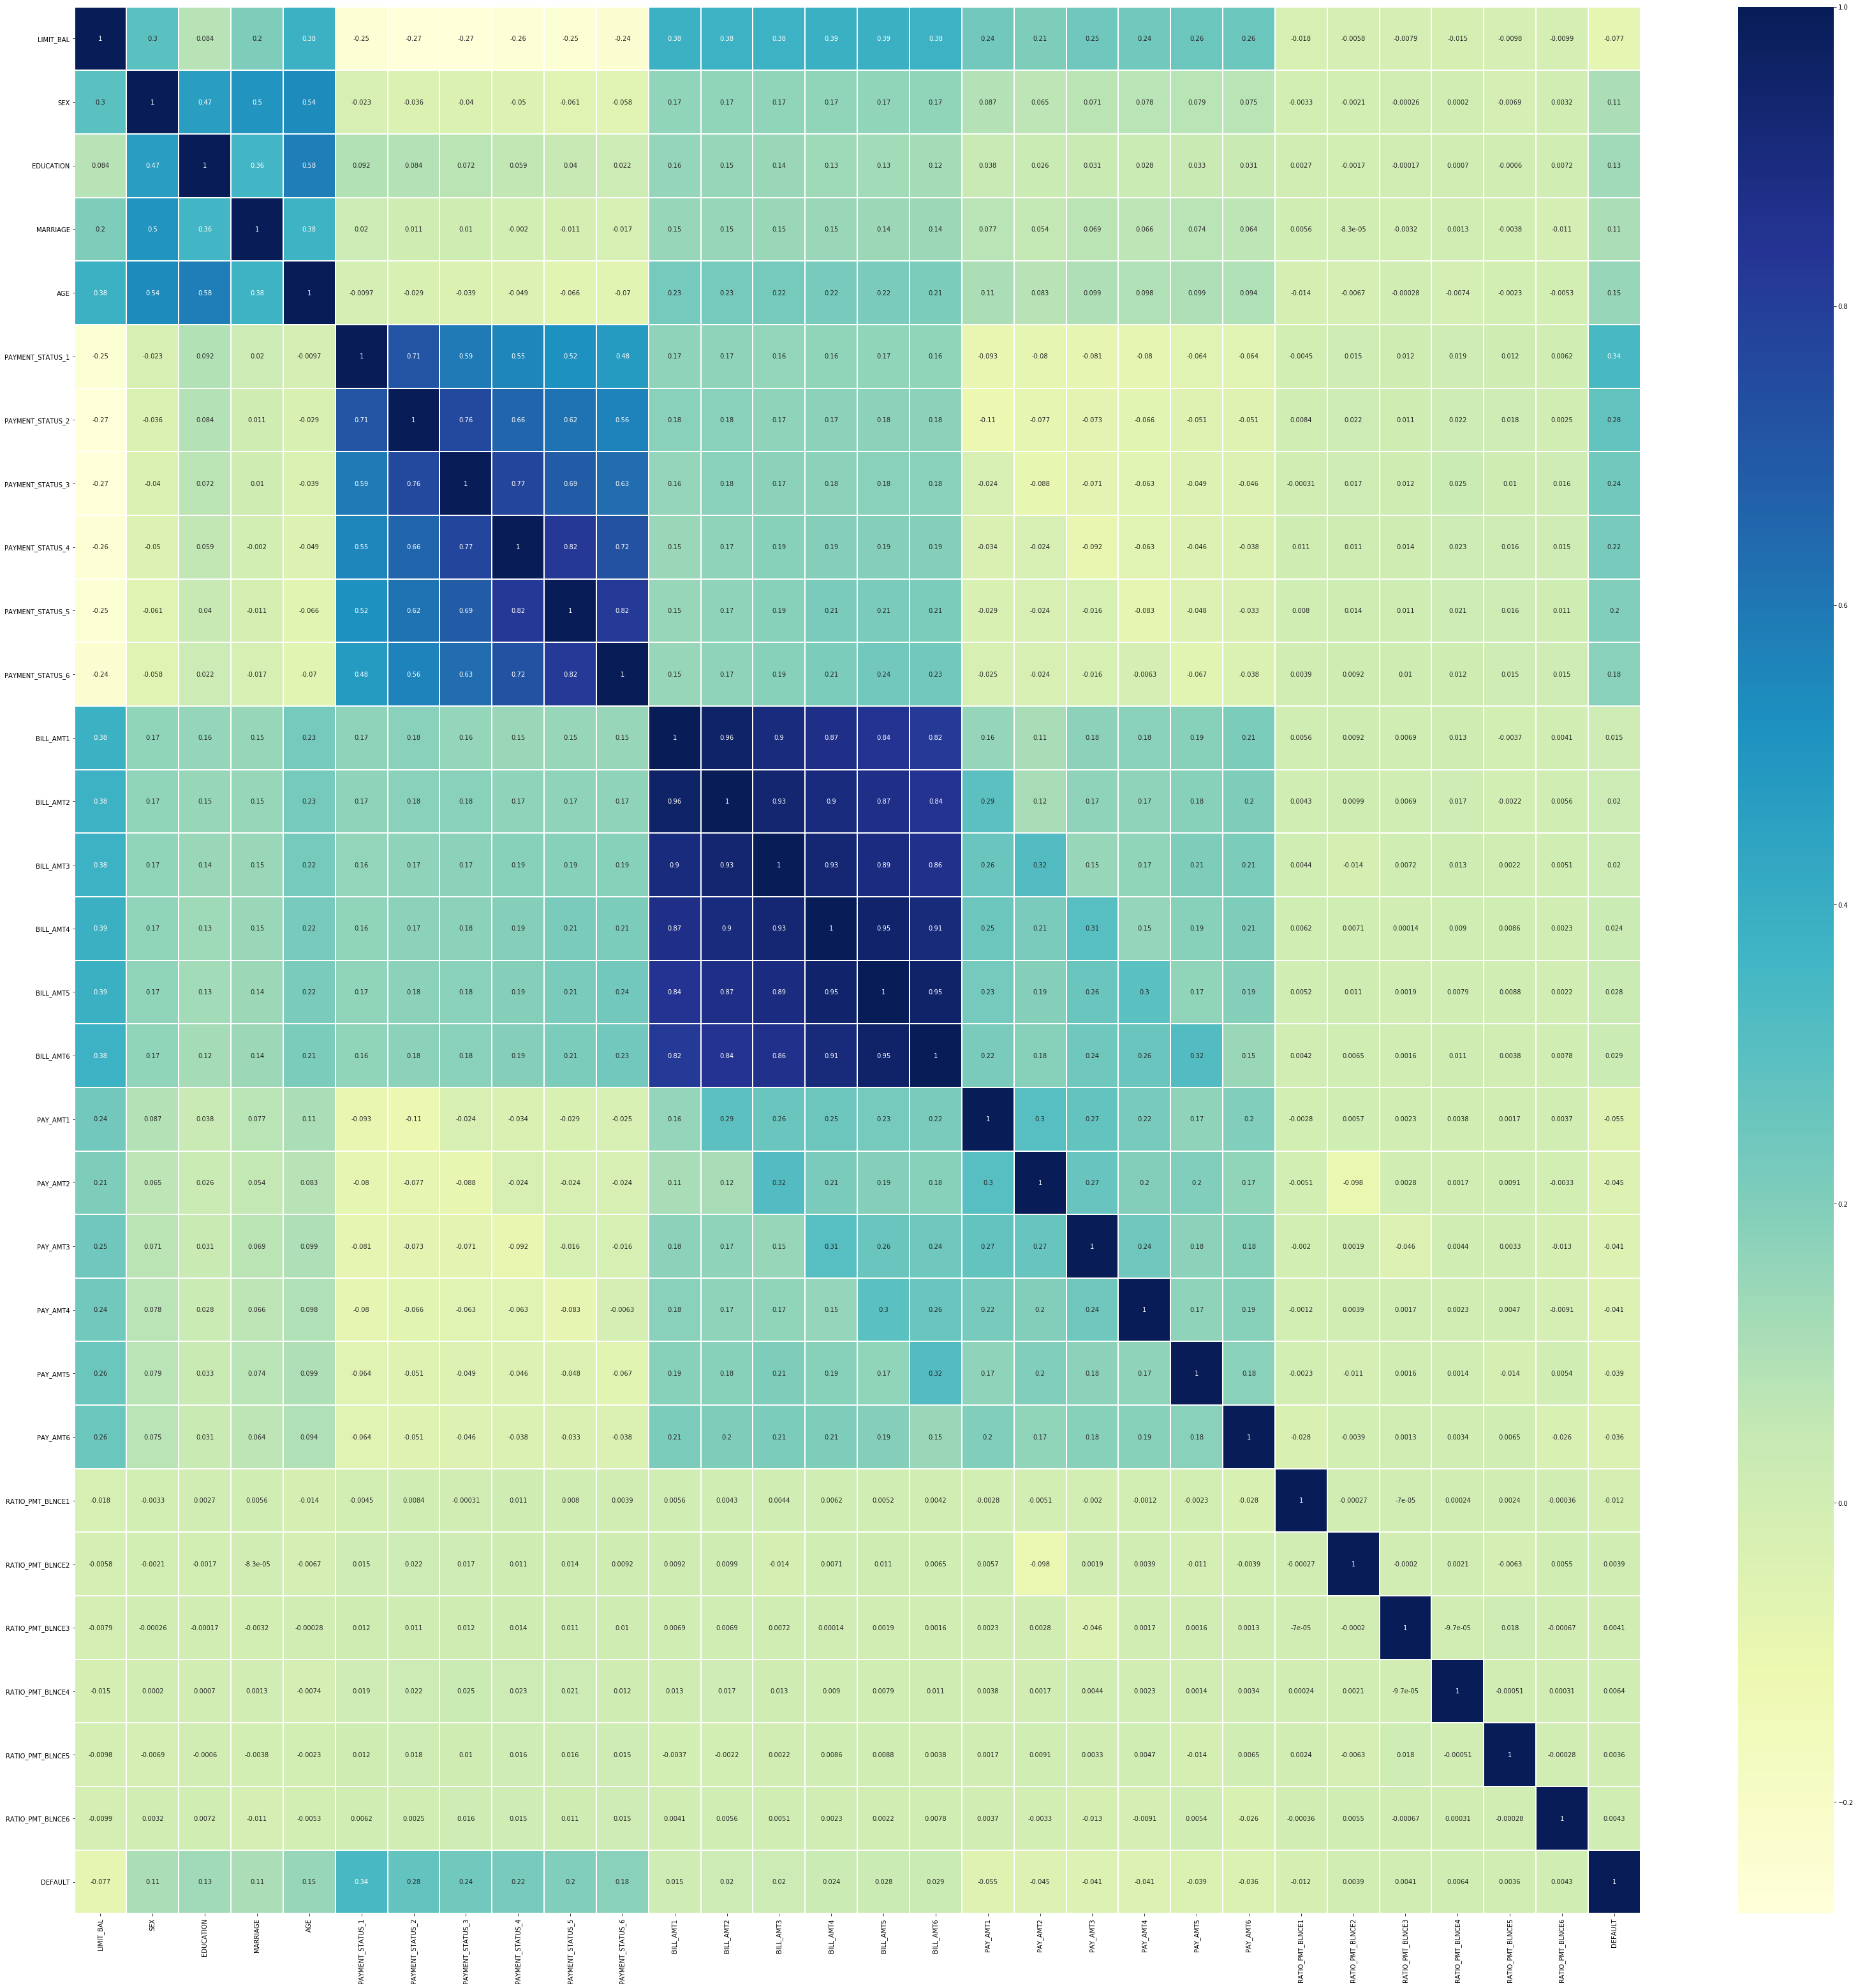

In [61]:
plt.figure(figsize=(55,55))
sns.heatmap(data_v2.corr(),annot=True, cmap='YlGnBu',linewidth=1);

Preparing the model/ Preprocessing

In [62]:
x = data[data.columns[:-1]]
y = data['DEFAULT']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, shuffle=True)

In [63]:
x2 = data_v2[data_v2.columns[:-1]]
y2 = data_v2['DEFAULT']

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, train_size=0.8, shuffle=True)

In [64]:
scaler = StandardScaler() 
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [65]:
scaler2 = StandardScaler() 
x2_train = scaler2.fit_transform(x2_train)
x2_test = scaler2.transform(x2_test)

In [66]:
log_model = linear_model.LogisticRegression(solver='liblinear')
log_model.fit(x_train,y_train)
log_model.score(x,y)

0.7774666666666666

In [101]:
log_model2 = linear_model.LogisticRegression(solver='liblinear')
log_model2.fit(x2_train,y2_train)
log_model2.score(x2,y2)

0.7934

In [68]:
log_predic = log_model.predict(x_test)
log_probability = log_model.predict_proba(x_test)

In [102]:
log_predic2 = log_model2.predict(x2_test)
log_probability2 = log_model2.predict_proba(x2_test)

In [103]:
log_model_score=cross_val_score(log_model, x_train, y_train)
log_model_score.mean()

0.8093333333333333

In [71]:
log_model2_score = cross_val_score(log_model2, x2_train, y2_train)
log_model2_score.mean()

0.8286666666666666

Scoring the model

In [72]:
print(f'accuracy: {metrics.accuracy_score(y_test, log_predic)}')
print(f'f1_score: {f1_score(y_test, log_predic)}')
print(f'precision: {precision_score(y_test, log_predic)}')
print(f'recall: {recall_score(y_test, log_predic)}')

accuracy: 0.8141666666666667
f1_score: 0.3646723646723647
precision: 0.7017543859649122
recall: 0.24634334103156275


In [73]:
print(f'accuracy using new data: {metrics.accuracy_score(y2_test, log_predic2)}')
print(f'f1_score using new data: {f1_score(y2_test, log_predic2)}')
print(f'precision using new data: {precision_score(y2_test, log_predic2)}')
print(f'recall using new data: {recall_score(y2_test, log_predic2)}')

accuracy using new data: 0.826
f1_score using new data: 0.3979238754325259
precision using new data: 0.6941649899396378
recall using new data: 0.2789005658852061


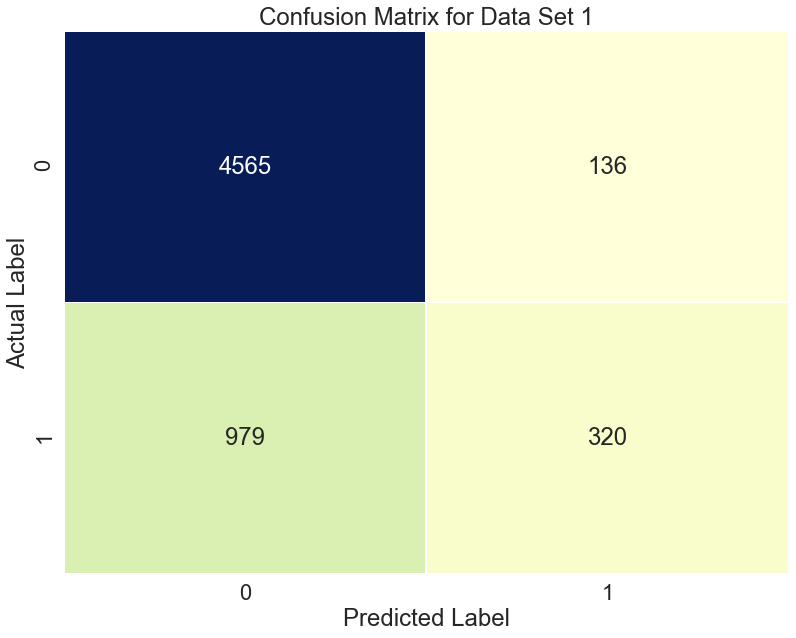

In [76]:
logreg_matrix = confusion_matrix(y_test,log_predic)
sns.set(font_scale=2)
plt.subplots(figsize=(13, 10))
sns.heatmap(logreg_matrix, annot=True, cbar=False, cmap='YlGnBu',linewidth=1,fmt="d")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Data Set 1');

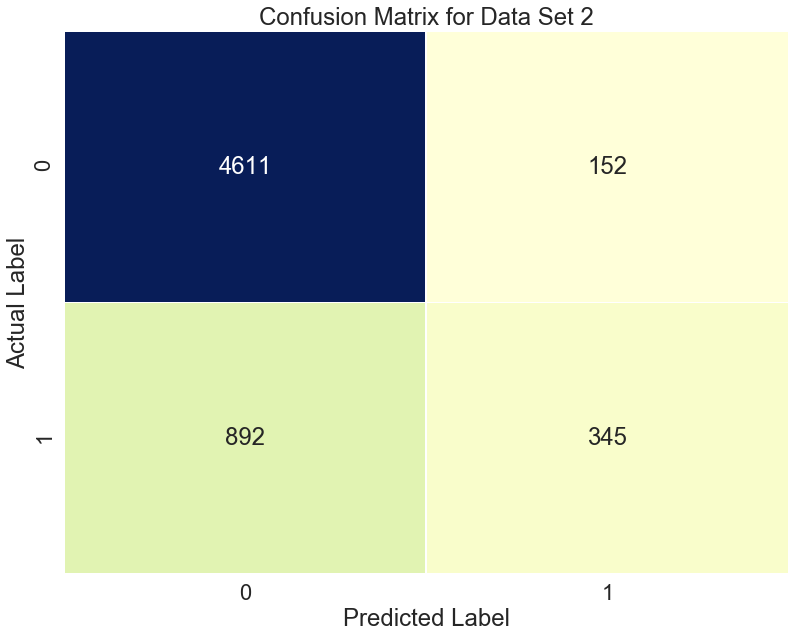

In [75]:
logreg_matrix = confusion_matrix(y2_test,log_predic2)
sns.set(font_scale=2)
plt.subplots(figsize=(13, 10))
sns.heatmap(logreg_matrix, annot=True, cbar=False, cmap='YlGnBu',linewidth=1,fmt="d")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Data Set 2');

Neural Network Section

In [77]:
neural_model = MLPClassifier(solver='sgd', alpha=0.0001, hidden_layer_sizes=(10,2))
neural_model2 = MLPClassifier(solver='sgd', alpha=0.0001, hidden_layer_sizes=(10,2))

In [78]:
neural_model.fit(x_train, y_train)
print(f'Original Data Set{neural_model.score(x_train, y_train)}')
neural_model2.fit(x2_train, y2_train)
print(f'New Data Set {neural_model2.score(x2_train, y2_train)}')

Original Data Set0.8184583333333333
New Data Set 0.8386666666666667


In [79]:
neural_predict = neural_model.predict(x_test)
neural_predict2 = neural_model2.predict(x2_test)

In [80]:
print(f'neural network model accuracy is: {neural_model.score(x_train, y_train)}')
print(f'neural network f1 score is: {f1_score(y_test, neural_predict)}')
print(f'neural network precision is: {precision_score(y_test, neural_predict)}')
print(f'neural network recall is: {recall_score(y_test, neural_predict)}')

neural network model accuracy is: 0.8184583333333333
neural network f1 score is: 0.45879959308240087
neural network precision is: 0.6761619190404797
neural network recall is: 0.34719014626635875


In [81]:
print(f'new neural network model accuracy is: {neural_model2.score(x2_train, y2_train)}')
print(f'new neural network f1 score is: {f1_score(y2_test, neural_predict2)}')
print(f'new neural network precision is: {precision_score(y2_test, neural_predict2)}')
print(f'new neural network recall is: {recall_score(y2_test, neural_predict2)}')

new neural network model accuracy is: 0.8386666666666667
new neural network f1 score is: 0.5124450951683748
new neural network precision is: 0.646551724137931
new neural network recall is: 0.4244139046079224


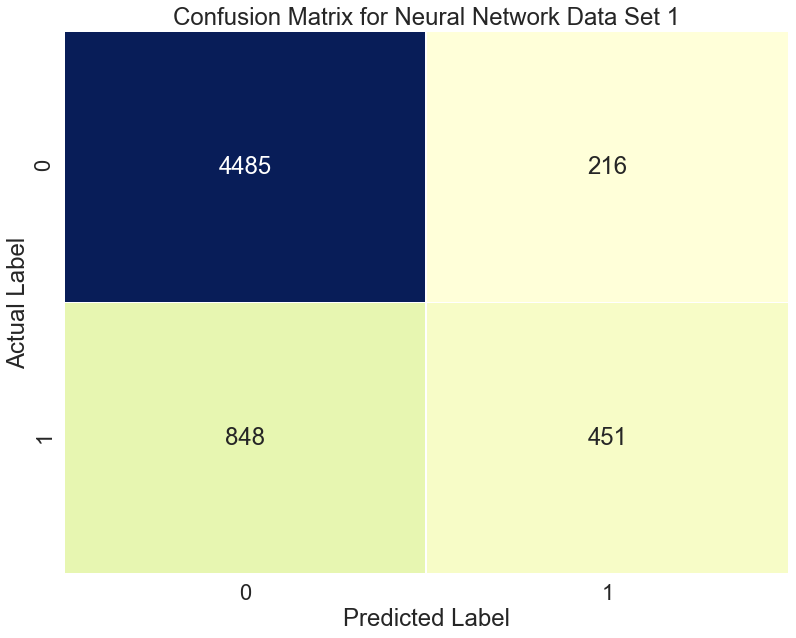

In [85]:
neural_matrix = confusion_matrix(y_test,neural_predict)
sns.set(font_scale=2)
plt.subplots(figsize=(13, 10))
sns.heatmap(neural_matrix, annot=True, cbar=False, cmap='YlGnBu',linewidth=1,fmt="d")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Neural Network Data Set 1');

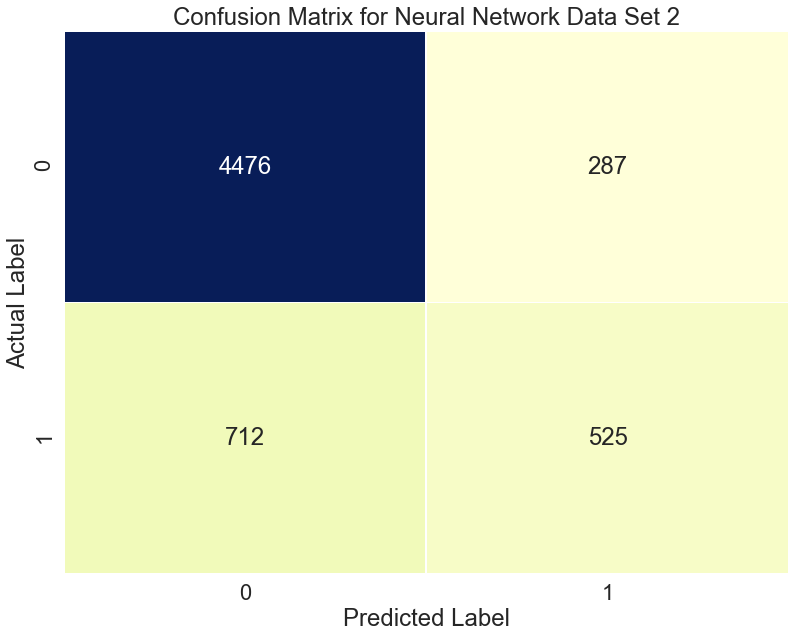

In [86]:
neural_matrix2 = confusion_matrix(y2_test,neural_predict2)
sns.set(font_scale=2)
plt.subplots(figsize=(13, 10))
sns.heatmap(neural_matrix2, annot=True, cbar=False, cmap='YlGnBu',linewidth=1,fmt="d")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Neural Network Data Set 2');

In [87]:
sm_model = sm.Logit(y_train, sm.add_constant(x_train)).fit()
sm_model2 = sm.Logit(y2_train, sm.add_constant(x2_train)).fit()

Optimization terminated successfully.
         Current function value: 0.465792
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.422445
         Iterations 7


Hypothesis Test

In [603]:
print(f'Summary of first data set: {sm_model.summary()}')
print(f'Summary of second data set: {sm_model2.summary()}')

Summary of first data set:                            Logit Regression Results                           
Dep. Variable:                   dpnm   No. Observations:                24000
Model:                          Logit   Df Residuals:                    23976
Method:                           MLE   Df Model:                           23
Date:                Wed, 22 Jul 2020   Pseudo R-squ.:                  0.1232
Time:                        15:01:12   Log-Likelihood:                -11066.
converged:                       True   LL-Null:                       -12622.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4850      0.019    -79.206      0.000      -1.522      -1.448
x1            -0.1000      0.023     -4.368      0.000      -0.145      -0.055
x2            -0.0613    

Conclusion: Both data sets provide evidence that there is a relationship between the given statistics and credit default rate so we reject the null hypthesis